In [42]:
#import relevant packagaes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltimport 
import matplotlib.image as mpimg

In [3]:
#%pip install scikit-image

import skimage
from skimage.transform import resize
from pathlib import Path

In [7]:
#load data
root = "/Users/chucklin/Documents/Github/COVID-detection-pipeline/Data/"
path = os.path.join(root,"COVIDGR_1.0")

Classes = ["Positive","Negative"]
img_size = 224

positive_train_path = os.path.join(path,"P")
negative_train_path = os.path.join(path,"N")

positive_train_img = list(Path(positive_train_path).glob("*.jpg"))
negative_train_img = list(Path(negative_train_path).glob("*.jpg"))

In [8]:
# To visualize the dataset
n_positive_train = len(positive_train_img)
n_negative_train = len(negative_train_img)

print("Training Set:")
print("Number of COVID Positive Lung X-rays: {}".format(n_positive_train))
print("Number of COVID Negative Lung X-rays: {}".format(n_negative_train))
print("Total number of images: {}".format(n_positive_train+n_negative_train))

Training Set:
Number of COVID Positive Lung X-rays: 426
Number of COVID Negative Lung X-rays: 426
Total number of images: 852


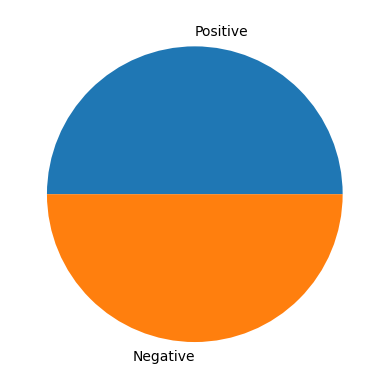

In [9]:
#vizualize the training distribution
plt.pie(np.array([n_positive_train,n_negative_train]),labels=Classes)
plt.show()

In [15]:
#convert images to numpy array

positive_np = np.empty((len(positive_train_img), img_size, img_size, 1), dtype=np.float32)
negative_np = np.empty((len(negative_train_img), img_size, img_size, 1), dtype=np.float32)

In [55]:
mpimg.imread(negative_train_img[0])

array([[  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       ...,
       [  1,   0, 128, ...,   0,   0,   0],
       [  2,   0, 128, ...,   0,   0,   2],
       [  0,   5, 141, ...,   1,   0,   0]], dtype=uint8)

In [56]:
#Positive
for i, img_name in enumerate(positive_train_img):
    try:
        temp_image = mpimg.imread(img_name)
        img_resize = resize(temp_image, (img_size, img_size, 1), anti_aliasing=True)
        positive_np[i] = img_resize
    except:
        continue
    

#Negative
for i, img_name in enumerate(negative_train_img):
    try:
        temp_image = mpimg.imread(img_name)
        img_resize = resize(temp_image, (img_size, img_size, 1), anti_aliasing=True)
        negative_np[i] = img_resize
    
    except:
        continue

In [57]:
print(positive_np.shape)
print(negative_np.shape)

(426, 224, 224, 1)
(426, 224, 224, 1)


In [46]:
np.save(os.path.join(root,"COVIDGR_1.0","COVID Positive Array 224"), positive_np, allow_pickle=False, fix_imports=False)
np.save(os.path.join(root,"COVIDGR_1.0","COVID Negative Array 224"), negative_np, allow_pickle=False, fix_imports=False)

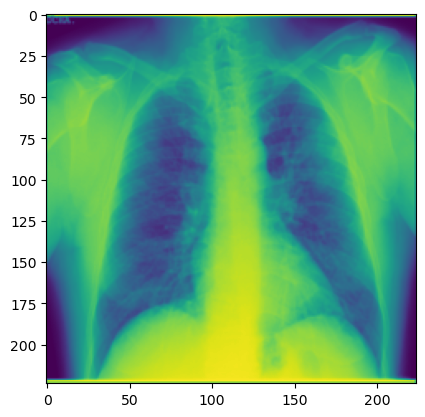

In [61]:
plt.imshow(positive_np[10])

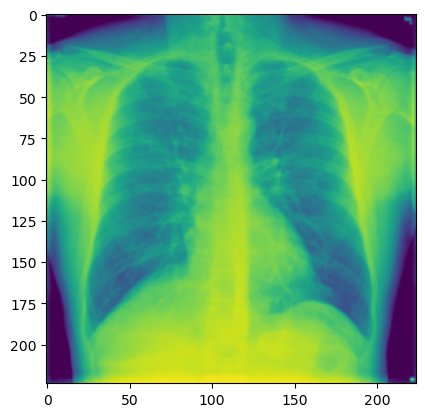

In [60]:
plt.imshow(negative_np[10])